# PYTHON FOR DATA SCIENCE

<a href="https://colab.research.google.com/github/EMSIMa/DS/blob/main/Python%20For%20Data%20Science%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Nouveau Dataset : Plus de Memes !

In [ ]:
#@title .
%%html
<figure>
<center>
<img src='https://www.budgetsaresexy.com/images/you-get-a-meme-oprah.jpg' width=400 height=300/>
<figcaption></figcaption></center>
</figure>

Les données initiales proviennent de : https://www.kaggle.com/sayangoswami/reddit-memes-dataset

In [ ]:
import pandas as pd
initial_data = pd.read_csv('https://raw.githubusercontent.com/EMSIMa/DS/main/reddit_memes.csv', header=0, index_col=0)

In [ ]:
initial_data.tail(3)

,author,media,downs,title,created_utc,width,thumbnail,height,ups,id
3223,Mambatony,https://i.redd.it/bqhsh59q0sxz.png,0,disgusting...,1.510594e+09,140,https://a.thumbs.redditmedia.com/VEhSkmJhQFDpz...,137,701,7colnv
3224,Holofan4life,https://i.imgur.com/uinYISg.png,0,I'd pay to see it,1.522068e+09,140,https://b.thumbs.redditmedia.com/JqLYENKMIzTwU...,139,7651,878r2b
3225,Holofan4life,https://i.imgur.com/f0vsMo8.jpg,0,There's one,1.515661e+09,140,https://a.thumbs.redditmedia.com/8UFE5XxvGCHTm...,140,7587,7pmvxq


In [ ]:
import matplotlib.pyplot as plt

(3226, 10)


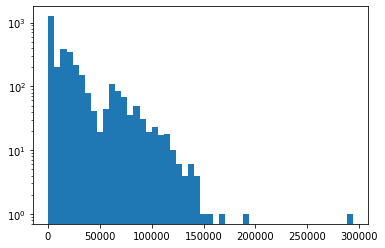

In [ ]:
plt.hist(initial_data['ups'], bins=50, log=True);
print(initial_data.shape)

In [ ]:
#@title Data Science Problems
%%html
<figure>
<center>
<img src='https://i.imgflip.com/39qq22.jpg' width=400 height=250/>
<figcaption></figcaption></center>
</figure>

Ce DataSet n'est pas suffisant pour creer un modele qui prevoit si un meme est bon ou pas 

In [ ]:
#@title Ne vous inquietez pas...
%%html
<figure>
<center>
<img src='https://miro.medium.com/max/550/0*Bj_O1jRFzZjKxzi4.jpg' width=400 height=300/>
<figcaption></figcaption></center>
</figure>

# Faire du Scrapping de commentaires depuis le subreddit "Dank Memes"

Grace au fichier [db.json](https://www.kaggle.com/datasets/sayangoswami/reddit-memes-dataset) qui contient les metadata sur les memes de notre dataset, nous avons parcouru le subreddit r/dankmemes/ pour récupérer les commentaires. 
Nous avons utilisé:
* selenium : à l'origine, une bibliothèque de tests javascript, couramment utilisée pour le scrapping de sites web avec chargement de contenu dynamique 

* chrome-driver : navigateur chrome, mais headless (sans GUI)

Nous obtenons donc un nouveau dataset avec des commentaires

In [ ]:
raw = pd.read_csv('https://raw.githubusercontent.com/EMSIMa/DS/main/memes_data_full2.csv', header=0, index_col=0)

raw = raw.dropna()

In [ ]:
raw.head()

,author,media,downs,title,created_utc,width,thumbnail,height,ups,id,comment,usr,total_cmnts,percent_ups
0,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,dank.,savageaxebot,509 comments,91% Upvoted
1,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,farmer: well if the bank doesn't kick me off t...,pacificol,509 comments,91% Upvoted
2,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,banker: we need a way to ensure that food can'...,evolving_dore,509 comments,91% Upvoted
3,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,if the bank doesn't enforce a punishment for d...,2 years ago,509 comments,91% Upvoted
4,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,many farmers went bankrupt because they were c...,drsandbags,509 comments,91% Upvoted


In [ ]:
#@title .
%%html
<figure>
<center>
<img src='https://i.imgflip.com/3ar5z2.jpg' width=400 height=400/>
<figcaption></figcaption></center>
</figure>

In [ ]:
memes = raw.groupby('id').apply(lambda x: pd.Series(\
  {'comments'       : ' '.join(x['comment']).lower().replace('dank', ' '),\
   'sampled_cmnts'  : len(x), \
   'sampled_cmnters': len(x['usr'].unique()),
   'dank'           : len(x[(x['usr']=='savageaxebot') & (x['comment'].apply(lambda x: 'dank' in x))])>0,
    'author'        : x['author'].iloc[0],
    'media'         : x['media'].iloc[0],
    'title'         : x['title'].iloc[0], 
    'ups'           : x['ups'].iloc[0],
    'total_cmnts'   : x['total_cmnts'].iloc[0].split()[0],
    'percent_ups'  :  int(x['percent_ups'].iloc[0].split()[0][:-1])})).reset_index()

memes['total_cmnts'] = memes['total_cmnts'].apply(lambda x: float(x[:-1])*1000 if x[-1]=='k' else float(x))

In [ ]:
memes.head(5)

,id,comments,sampled_cmnts,sampled_cmnters,dank,author,media,title,ups,total_cmnts,percent_ups
0,51xh6y,here is a larger version of the imagealso got ...,16,15,False,pete7201,https://i.redd.it/9ytusfmcbikx.jpg,my . if you upvote this post it will come up o...,18517,94.0,78
1,56qdez,what about my favourite adolf?edit: 👌👌wow👌👌👌th...,21,21,False,swagmaster1155,http://i.imgur.com/Jdnb1st.jpg,me irl,14734,48.0,95
2,5blhtv,"congrats, you reached /r/all! make reddit grea...",17,16,False,just__my__up,https://i.redd.it/nda2tqf0f6wx.jpg,you guys ready?,28890,582.0,91
3,5btgto,ahh hail jeb! my name is jeb! oh jeb can you s...,19,19,False,syntheticstupidity,http://i.imgur.com/UYXRlNI.png,🔥 leaked results of tonight's election! 🔥,23478,151.0,92
4,5bycmm,this is literally me rn 😂😂😂👌👌👌 remember when a...,15,15,False,relational_sense,http://i.imgur.com/trS2xCh.png,democrats right now,24265,177.0,91
